Estimate the bicarbonates of well water based on its pH value using simple regression model. Consider SGD optimizer. Dataset: Union Carbide Technical Report

 Write the python code to build simple linear regression model using SGD optimizer

 Do the data normalization

Split the data for train and test (90:10)

 Train the simple linear regression model using SGD with

training data

 Compute MSE, RMSE and MAE with training data Compute MSE, RMSE and MAE with testing data

In [22]:
import pandas as pd
data = pd.read_csv("C:\\Users\\saiteja\\Downloads\\ground.csv")

In [28]:
data.head(34)

,X,Y
0,7.6,157
1,7.1,174
2,8.2,175
3,7.5,188
4,7.4,171
5,7.8,143
6,7.3,217
7,8.0,190
8,7.1,142
9,7.5,190


In [32]:
data.isnull().sum()

X    0
Y    0
dtype: int64

In [33]:
# Import libraries 
import matplotlib.pyplot as plt 
import numpy as np 

{'whiskers': [<matplotlib.lines.Line2D at 0x297e659ea48>,
 'caps': [<matplotlib.lines.Line2D at 0x297e65e4dc8>,
 'boxes': [<matplotlib.lines.Line2D at 0x297e65e45c8>,
 'medians': [<matplotlib.lines.Line2D at 0x297e65e8dc8>,
 'fliers': [<matplotlib.lines.Line2D at 0x297e65e8e48>,
 'means': []}

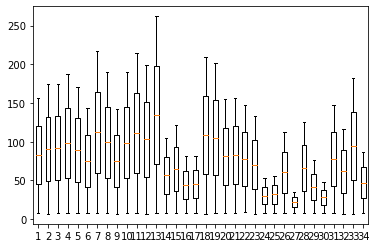

In [38]:
plt.boxplot(data)

In [39]:
# import necessary modules
from sklearn import preprocessing

In [43]:
norm=preprocessing.normalize(data)

In [44]:
norm

array([[0.04835103, 0.99883041],
       [0.04077067, 0.99916853],
       [0.04680579, 0.99890401],
       [0.03986191, 0.9992052 ],
       [0.04323439, 0.99906496],
       [0.05446449, 0.99851571],
       [0.03362153, 0.99943464],
       [0.04206799, 0.99911475],
       [0.04993762, 0.99875234],
       [0.03944297, 0.99922182],
       [0.03764771, 0.99929107],
       [0.03515414, 0.9993819 ],
       [0.02785179, 0.99961206],
       [0.07408159, 0.99725218],
       [0.06022108, 0.99818506],
       [0.09828722, 0.99515809],
       [0.10310607, 0.99467037],
       [0.03379022, 0.99942895],
       [0.04056065, 0.99917708],
       [0.05090167, 0.99870367],
       [0.04835103, 0.99883041],
       [0.05975697, 0.99821296],
       [0.05405619, 0.9985379 ],
       [0.14742783, 0.98907282],
       [0.14315312, 0.98970055],
       [0.06798394, 0.99768642],
       [0.23337295, 0.9723873 ],
       [0.05909653, 0.99825227],
       [0.09561258, 0.99541862],
       [0.17437044, 0.98468013],
       [0.

In [51]:
x= data.iloc[:, :-1].values  
y= data.iloc[:, 1].values   

In [52]:
x

array([[7.6],
       [7.1],
       [8.2],
       [7.5],
       [7.4],
       [7.8],
       [7.3],
       [8. ],
       [7.1],
       [7.5],
       [8.1],
       [7. ],
       [7.3],
       [7.8],
       [7.3],
       [8. ],
       [8.5],
       [7.1],
       [8.2],
       [7.9],
       [7.6],
       [8.8],
       [7.2],
       [7.9],
       [8.1],
       [7.7],
       [8.4],
       [7.4],
       [7.3],
       [8.5],
       [7.8],
       [6.7],
       [7.1],
       [7.3]])

In [53]:
y

array([157, 174, 175, 188, 171, 143, 217, 190, 142, 190, 215, 199, 262,
       105, 121,  81,  82, 210, 202, 155, 157, 147, 133,  53,  56, 113,
        35, 125,  76,  48, 147, 117, 182,  87], dtype=int64)

In [55]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.1, random_state=0)  

In [56]:
from sklearn.linear_model import SGDRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [77]:
reg = make_pipeline(StandardScaler(),
                 SGDRegressor(max_iter=10000, tol=1e-3))

In [78]:
reg.fit(x_train,y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('sgdregressor',
                 SGDRegressor(alpha=0.0001, average=False, early_stopping=False,
                              epsilon=0.1, eta0=0.01, fit_intercept=True,
                              l1_ratio=0.15, learning_rate='invscaling',
                              loss='squared_loss', max_iter=10000,
                              n_iter_no_change=5, penalty='l2', power_t=0.25,
                              random_state=None, shuffle=True, tol=0.001,
                              validation_fraction=0.1, verbose=0,
                              warm_start=False))],
         verbose=False)

In [79]:
predicted = reg.predict(x_test)

In [80]:
predicted

array([160.84556582, 142.27663112, 139.18180867, 157.75074337])

In [84]:
train_y_hat = reg.predict(x_train)
print("Train Mean absolute error(MAE): %.2f" % np.mean(np.absolute(train_y_hat - y_train)))
test_y_hat = reg.predict(x_test)
print("Test Mean absolute error(MAE: %.2f" % np.mean(np.absolute(test_y_hat - y_test)))

Train Mean absolute error(MAE): 46.58
Test Mean absolute error(MAE: 32.83


In [85]:
print("Train Residual sum of squares (MSE): %.2f" % np.mean((train_y_hat - y_train) ** 2))
print("Test Residual sum of squares (MSE): %.2f" % np.mean((test_y_hat - y_test) ** 2))

Train Residual sum of squares (MSE): 2878.79
Test Residual sum of squares (MSE): 1272.00


In [86]:
print("Train Mean Square Error (RMSE): %.2f" % np.sqrt(np.mean((train_y_hat - y_train) ** 2)))
print("Test Mean Square Error (RMSE): %.2f" % np.sqrt(np.mean((test_y_hat - y_test) ** 2)))

Train Mean Square Error (RMSE): 53.65
Test Mean Square Error (RMSE): 35.67
